In [2]:
# importing libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [5]:
# picking just a few columns
df = df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent','chocolate']]
df.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0


In [6]:
# split the data into train test sets
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2)

In [7]:
print(type(trainset))

<class 'pandas.core.frame.DataFrame'>


In [8]:
trainset.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
37,0,1,0,1,0,0,1,0,0.732,0.441,60.800701,1
34,1,0,0,0,0,0,0,1,0.872,0.325,46.411716,0
63,1,0,0,0,0,1,0,1,0.267,0.116,45.995827,0
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
42,0,0,1,0,0,0,1,0,0.604,0.767,70.735641,1


In [9]:
trainset.isnull().sum()

fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
chocolate           0
dtype: int64

In [10]:
# load the values into X_train, y_trian , X_test, y_test
X_train = trainset.iloc[:, :-1] 
y_train = trainset.iloc[:, -1]
X_test = testset.iloc[:, :-1]
y_test = testset.iloc[:, -1] 

In [11]:
# checking the type of the splits
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [14]:
trainset.describe()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.470588,0.147059,0.147059,0.058824,0.044118,0.132353,0.191176,0.573529,0.477368,0.440529,49.690802,0.411765
std,0.502845,0.356798,0.356798,0.237044,0.206883,0.341394,0.396151,0.498241,0.295795,0.268324,15.075152,0.495812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.246250,39.099551,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.501492,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,57.723468,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290,1.000000


### Model deveplopment and prediction

In [15]:
# import sklearn lR module
# fit the train data 
# perform prediction on the test data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()   # create a logistic regression object
lr.fit(X_train,y_train)     # fiting the lr object into the training set
y_pred =  lr.predict(X_test)  # using the test set to make pre

## evaluation with confusion matrix

In [16]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat

array([[5, 3],
       [1, 8]], dtype=int64)

### visualize the  confusion matrix with heatmap

Text(0.5, 427.9555555555555, 'Predicted label')

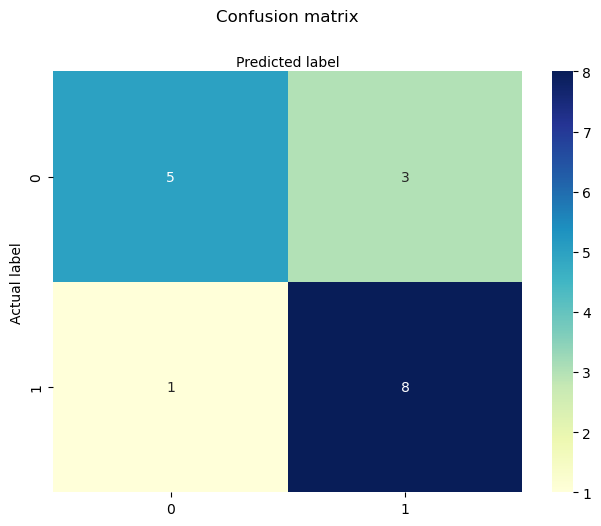

In [18]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

### metrics report: accuracy, precision and recall

In [19]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))

Accuracy 0.7647058823529411
Precision 0.7272727272727273
Recall 0.8888888888888888


### ROC(Receiver Operation Characteristic) curve

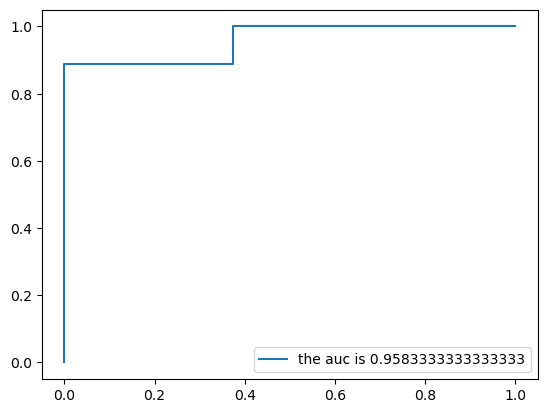

In [22]:
prob_y_pred = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred)  ## why the underscore?
auc = metrics.roc_auc_score(y_test, prob_y_pred)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()